In [14]:
import xgboost as xgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

In [15]:
X = datasets.fetch_covtype().data[:3000]
y = datasets.fetch_covtype().target[:3000]
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_va, y_train, y_va = train_test_split(X_1, y_1)

print(X_train.shape, y_train.shape)
print(np.unique(y_train))  # 7分类任务

(2025, 54) (2025,)
[1 2 3 4 5 6 7]


In [16]:
enc = OrdinalEncoder()
y_train_enc = enc.fit_transform(y_train.reshape(-1, 1))
y_test_enc = enc.transform(y_test.reshape(-1, 1))
y_va_enc = enc.fit_transform(y_va.reshape(-1, 1))
print(np.unique(y_train_enc))
print(y_train_enc.shape)

[0. 1. 2. 3. 4. 5. 6.]
(2025, 1)


In [17]:
# label.shape = (num_sample, 1)
train_dataset = xgb.DMatrix(data=X_train, label=y_train_enc)
val_dataset = xgb.DMatrix(data=X_va, label=y_va_enc)
test_dataset = xgb.DMatrix(data=X_test)

In [18]:
params = {'objective': 'multi:softprob',
          "eval_metric": 'mlogloss',
           "verbosity": 0,
          'num_class': 7}
eval_set = [(train_dataset, "train_"), (val_dataset, "val_")]
evals_result = {}  # 储存评估指标(内置和自定义)结果

In [19]:
from sklearn.metrics import log_loss


def my_xgb_loss(y_pred, y_true):
    """xgboost自定义验证数据集损失函数格式"""
    loss = log_loss(y_true.get_label(), y_pred)
    return 'MY_GBM_LOSS', loss

In [20]:
model = xgb.train(params=params,
                  dtrain=train_dataset,
                  # num_boost_round (int) – Number of boosting iterations.
                  # 默认num_boost_round=10
                  num_boost_round=200,
                  # List of validation sets for which metrics will evaluated during training.
                  evals=eval_set,
                  early_stopping_rounds=100,
                  # verbose_eval (bool or int) – Requires at least one item in evals.
                  # If verbose_eval is True then the evaluation metric on the validation set is printed at each boosting stage.
                  # If verbose_eval is an integer then the evaluation metric on the validation set is printed at every given verbose_eval boosting stage.
                  # The last boosting stage / the boosting stage found by using
                  verbose_eval=20,  # 默认verbose_eval=True
                  evals_result=evals_result,
                  feval=my_xgb_loss,
                  )

[0]	train_-mlogloss:1.33610	train_-MY_GBM_LOSS:1.23384	val_-mlogloss:1.44355	val_-MY_GBM_LOSS:1.33560
[20]	train_-mlogloss:0.17402	train_-MY_GBM_LOSS:0.41679	val_-mlogloss:0.47606	val_-MY_GBM_LOSS:1.38466
[40]	train_-mlogloss:0.07672	train_-MY_GBM_LOSS:0.31890	val_-mlogloss:0.44114	val_-MY_GBM_LOSS:1.56848
[60]	train_-mlogloss:0.03780	train_-MY_GBM_LOSS:0.24495	val_-mlogloss:0.43719	val_-MY_GBM_LOSS:1.58363
[80]	train_-mlogloss:0.02293	train_-MY_GBM_LOSS:0.20568	val_-mlogloss:0.44523	val_-MY_GBM_LOSS:1.71490
[100]	train_-mlogloss:0.01537	train_-MY_GBM_LOSS:0.17519	val_-mlogloss:0.46003	val_-MY_GBM_LOSS:2.03324
[101]	train_-mlogloss:0.01511	train_-MY_GBM_LOSS:0.17410	val_-mlogloss:0.46220	val_-MY_GBM_LOSS:2.03330


In [21]:
# 预测结果为概率向量(多分类)
# test_dataset:The dmatrix storing the input
model.predict(test_dataset)

array([[8.5724093e-02, 7.9593629e-01, 7.1532745e-04, ..., 1.1596788e-01,
        7.6018437e-04, 2.3378944e-04],
       [9.8686141e-01, 9.0798559e-03, 8.4227060e-05, ..., 9.3945047e-05,
        4.4607321e-05, 3.7510938e-03],
       [3.6399767e-02, 1.8915944e-03, 2.0911748e-05, ..., 4.6594716e-05,
        8.3718460e-06, 9.6161211e-01],
       ...,
       [4.2314949e-03, 5.3296695e-03, 4.1534472e-04, ..., 9.8859239e-01,
        2.1629856e-04, 1.0305417e-03],
       [6.2771542e-05, 1.6183738e-03, 6.5105589e-05, ..., 9.9815482e-01,
        2.4085921e-05, 9.1524871e-06],
       [2.4034578e-01, 7.5935215e-01, 9.3843504e-05, ..., 6.3547610e-05,
        3.7362592e-05, 4.8531696e-05]], dtype=float32)

In [22]:
evals_result

{'train_': OrderedDict([('mlogloss',
               [1.336102,
                1.05022,
                0.860684,
                0.719253,
                0.61593,
                0.538543,
                0.480993,
                0.430668,
                0.387472,
                0.354741,
                0.32601,
                0.30166,
                0.281208,
                0.26351,
                0.247984,
                0.234603,
                0.221481,
                0.208873,
                0.192625,
                0.184475,
                0.174024,
                0.166824,
                0.160834,
                0.150753,
                0.14351,
                0.137517,
                0.131744,
                0.126627,
                0.122188,
                0.116925,
                0.111549,
                0.106609,
                0.103591,
                0.099483,
                0.096116,
                0.093508,
                0.090041,
       

In [23]:
evals_result['train_'].keys()

odict_keys(['mlogloss', 'MY_GBM_LOSS'])

In [24]:
# 特征的相对重要性
xgb.plot_importance(model)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

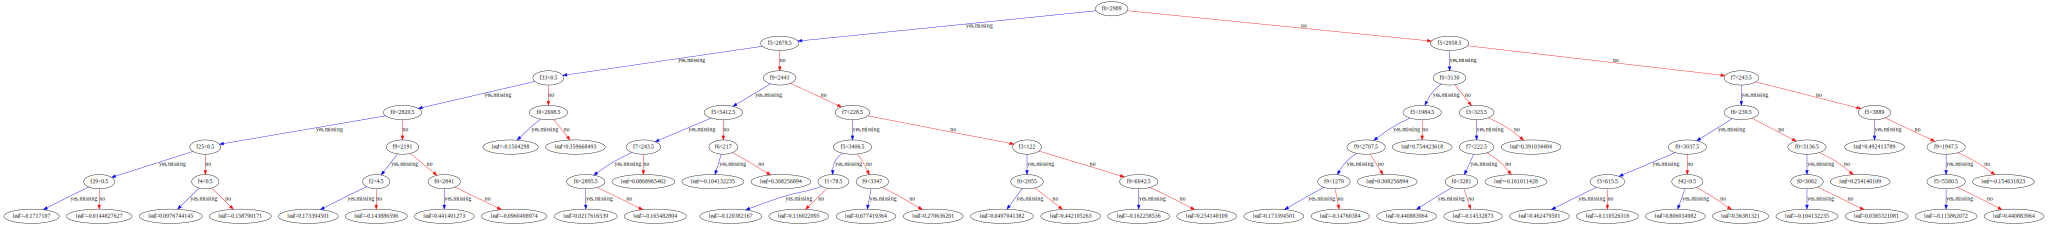

In [25]:
# 可视化lgb分割过程
img = xgb.to_graphviz(model)
img

In [26]:
# 数据类型graphviz.files.Source
type(img)




graphviz.files.Source